<div style="border-radius:10px;
            border : black solid;
            background-color: white;
            font-size:100%;
            text-align: left">
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:purple'><center> ⚕️🩺💉 Chronic Kidney Disease (CKD)💉🩺⚕️  </center></h2>




<img src ='https://i.ytimg.com/vi/5QHtg7_wSnM/maxresdefault.jpg' >


# 🧠 Algorithms Explored:
In this project, I explored a diverse set of machine learning algorithms to maximize accuracy and robustness in kidney disease prediction:

- Logistic Regression 📈
- Decision Trees 🌳
- Bagging 🛍️
- Random Forest Classifier 🌲
- k-Nearest Neighbors (KNN) 👥
- Support Vector Machines (SVM) 🌀
- AdaBoost 🚀
- Gradient Boosting 📈
- XGBoost 🚀
- -Gaussian Naive Bayes (GNB) 🌐
- Bernoulli Naive Bayes (BNB) 📊

📈 Project Highlights:

Data Preprocessing: Meticulous data cleaning and preprocessing, including handling missing values, feature scaling, and encoding categorical variables.

Performance Evaluation: Comprehensive evaluation using metrics such as accuracy, precision, recall, and F1-score to gain deep insights into algorithm strengths.

Comparative Analysis: Thorough comparison of algorithm performance to determine the most promising techniques for kidney disease prediction.

In [1]:
#-------------------------------------
#   Kidney disease Dataset features
#------------------------------------
# 1. Features:
# id -id
# age -age
# bp -blood pressure
# sg -specific gravity
# al -albumin
# su -sugar
# rbc -red blood cells
# pc - pus cell
# pcc -pus cell clumps
# ba -bacteria
# bgr -blood glucose random
# bu -blood urea
# sc -serum creatinine
# sod -sodium
# pot -potassium
# hemo -haemoglobin
# pcv -packed cell volume
# wc -white blood cell count
# rc -red blood cell count
# htn -hypertension
# dm -diabetes mellitus
# cad -coronary artery disease
# appet -appetite
# pe -pedal edema
# ane -anemia
# classification - {ckd : having chronic kidney disease, notckd :  having chronic kidney disease}




 <h2 style='; font-weight: bold; font-size:200%; color:blue'>🗂️Importing Libraries</h2>  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

 <h2 style='; font-weight: bold; font-size:200%; color:blue'>⏳ Loading Dataset</h2>  

In [3]:
dataset = 'kidney_disease.csv'
df = pd.read_csv(dataset)
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0   0.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

 <h2 style='; font-weight: bold; font-size:200%; color:blue'>⏳ Exoloring Dataset</h2>  

In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

 <h2 style='; font-weight: bold; font-size:200%; color:blue'>📝 Changing the column names</h2>  

In [6]:
new_col_name = {
    'sg'   : 'specific_gravity',
    'al'   : 'albumin',
    'bp'   : 'blood_pressure',
    'su'   : 'sugar',
    'pc'   : 'puss_cell',
    'pcc'  : 'puss_cell_clump',
    'ba'   : 'bacteria',
    'bgr'  : 'blood_glucose_random',
    'bu'   : 'blood_urea',
    'sc'   : 'serum_creatinine',
    'sod'  : 'sodium',
    'pot'  : 'potassium',
    'hemo' : 'haemoglobin',
    'pcv'  : 'packed_cell_volume',
    'wc'   : 'wbc_count',
    'rc'   : 'rbc_count',
    'htn'  : 'hypertension',
    'dm'   : 'diabetes_mellitus',
    'cad'  : 'coronary_artery_disease',
    'appet': 'appetite',
    'pe'   : 'pedal_edema',
    'ane'  : 'anemia'

}

# Rename the columns
df.rename(columns=new_col_name, inplace=True)


 <h2 style='; font-weight: bold; font-size:200%; color:blue'> 🧽 Cleaning of dataset</h2>  

In [7]:
df.drop(['id'], axis =1,inplace =True)

### **Checking and Removing Duplicates**

In [8]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

'No duplicate entries'

In [9]:
obj_col = df.select_dtypes(include=['object']).columns

obj_col

Index(['rbc', 'puss_cell', 'puss_cell_clump', 'bacteria', 'packed_cell_volume',
       'wbc_count', 'rbc_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia',
       'classification'],
      dtype='object')

In [10]:
for col in obj_col:
    print('-'*35)
    #print("  "*5,col)
    #print('-'*35)
    print()
    print(col, ':', df[col].unique())
    print()

-----------------------------------

rbc : [nan 'normal' 'abnormal']

-----------------------------------

puss_cell : ['normal' 'abnormal' nan]

-----------------------------------

puss_cell_clump : ['notpresent' 'present' nan]

-----------------------------------

bacteria : ['notpresent' 'present' nan]

-----------------------------------

packed_cell_volume : ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

-----------------------------------

wbc_count : ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '127

## There are some unusual charecters ('\t','?',' ', '\t?') in the object columns
### - `packed_cell_volume`,
### -`wbc_count`,
### -`rbc_count`,
### - `diabetes_mellitus`,
### -`coronary_artery_disease `,
### -`classification`

In [11]:
df[obj_col] = df[obj_col].replace(['\t', '\?',' '], '', regex=True)

In [12]:
corrupt_col =['packed_cell_volume','wbc_count', 'rbc_count',
              'diabetes_mellitus','coronary_artery_disease',
              'classification']
for col in corrupt_col:
    print('-'*35)
    print()
    print(col, ':', df[col].unique())
    print()

-----------------------------------

packed_cell_volume : ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']

-----------------------------------

wbc_count : ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600

In [13]:
num_not_obj = ['packed_cell_volume','wbc_count','rbc_count']
for col in num_not_obj:
    print(col, '\n',df[col].unique())

packed_cell_volume 
 ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
wbc_count 
 ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
rbc_count 
 ['5.2' nan '3.9' '4.6' '4.4' '5' '4' '3.7' '3.8' '3.4' '2.6'

# `packed_cell_volume`, `wbc_count`,`rbc_count` has a unique charecter '' which need to be replaced by nan.

In [14]:

for col in num_not_obj:
    df[col] = df[col].replace('', np.nan, regex=True)

<Axes: >

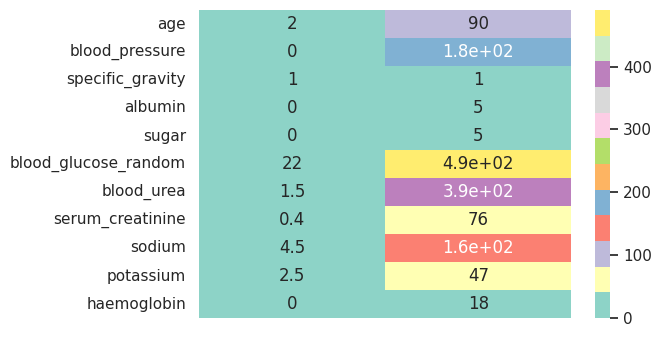

In [15]:
desc = df.describe(include ='number').T[['min','max']]
plt.figure(figsize=(6,4))
sns.heatmap(desc, annot= True, cmap='Set3', cbar=True, xticklabels= False,)

## changing the value zero in `blood_pressure`,`albumin`,`sugar`,`haemoglobin`, to nan.

In [16]:
zero_col = ['blood_pressure', 'albumin','sugar' ,'haemoglobin']
for col in zero_col:
    df[col].replace(0, np.nan, inplace=True)

In [17]:
# mode values of all the object column
df.describe(exclude ='number').T#['top']

count unique         top freq
rbc                       248      2      normal  201
puss_cell                 335      2      normal  259
puss_cell_clump           396      2  notpresent  354
bacteria                  396      2  notpresent  374
packed_cell_volume        329     42          41   21
wbc_count                 294     89        9800   11
rbc_count                 269     45         5.2   18
hypertension              398      2          no  251
diabetes_mellitus         398      2          no  261
coronary_artery_disease   398      2          no  364
appetite                  399      2        good  317
pedal_edema               399      2          no  323
anemia                    399      2          no  339
classification            400      2         ckd  250

In [18]:
for col in num_not_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           386 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  155 non-null    float64
 4   sugar                    61 non-null     float64
 5   rbc                      248 non-null    object 
 6   puss_cell                335 non-null    object 
 7   puss_cell_clump          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [20]:
new_num_col = df.select_dtypes(exclude=['object']).columns.tolist()
new_obj_col = df.select_dtypes(include=['object']).columns.tolist()
print('numeric columns :', new_num_col, '\nobject columns :', new_obj_col)

numeric columns : ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'wbc_count', 'rbc_count'] 
object columns : ['rbc', 'puss_cell', 'puss_cell_clump', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


#### Checking null values

In [21]:
# percentage of null values
df.isnull().sum()*100/len(df)

age                         2.25
blood_pressure              3.50
specific_gravity           11.75
albumin                    61.25
sugar                      84.75
rbc                        38.00
puss_cell                  16.25
puss_cell_clump             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
haemoglobin                13.50
packed_cell_volume         17.75
wbc_count                  26.50
rbc_count                  32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
classification              0.00
dtype: float64

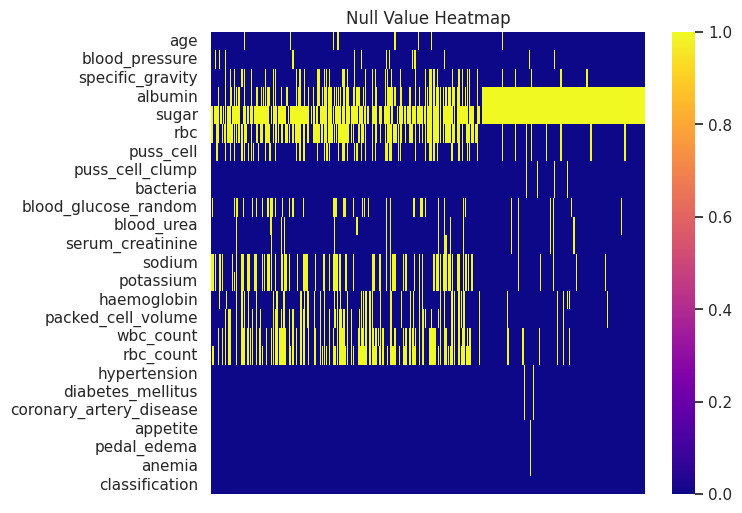

In [22]:
# Create a heatmap of null values

plt.figure(figsize=(7, 6))
sns.heatmap(df.isnull().T, cmap='plasma', cbar=True, xticklabels= False,)
plt.title('Null Value Heatmap')

# Display the plot
plt.show()

In [23]:
#checking most frequent value of num_not_obj = ['packed_cell_volume','wbc_count','rbc_count']
df.loc[:,num_not_obj].median()

packed_cell_volume      40.0
wbc_count             8000.0
rbc_count                4.8
dtype: float64

In [24]:
#checking most frequent value of num_not_obj = ['packed_cell_volume','wbc_count','rbc_count']
df[num_not_obj].mode()

packed_cell_volume  wbc_count  rbc_count
0                41.0     9800.0        5.2
1                52.0        NaN        NaN

In [25]:
# for col in num_not_obj:
#     df[col] = df[col].fillna(df[col].mode()[0])
for col in new_num_col:
    df[col] = df[col].fillna(df[col].median())
for col in new_obj_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
rbc                        0
puss_cell                  0
puss_cell_clump            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
wbc_count                  0
rbc_count                  0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

 <h2 style='; font-weight: bold; font-size:200%; color:blue'> 📊 Descriptive Statistics</h2>

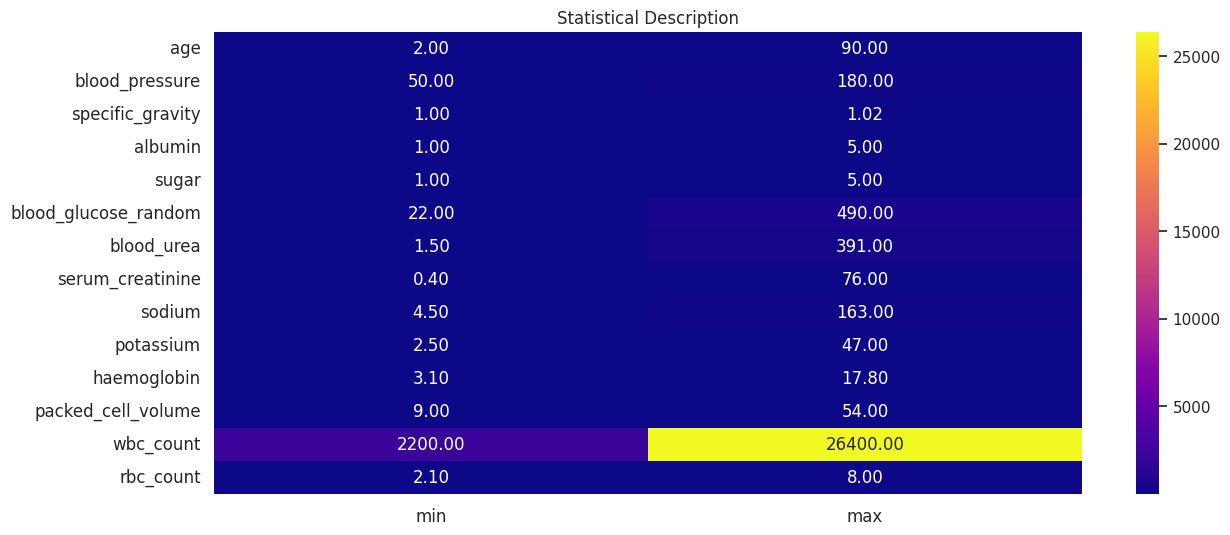

In [27]:
desc=df.describe().T[['min','max']]
def descriptive_stats(df):


    plt.figure(figsize=(14,6))
    sns.heatmap(df, annot=True, cmap='plasma', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()


descriptive_stats(desc)

## Checking Unique values of different features

                     Total no. of Unique Values
anemia                       2
diabetes_mellitus            2
pedal_edema                  2
coronary_artery_disease      2
appetite                     2
hypertension                 2
puss_cell_clump              2
bacteria                     2
rbc                          2
puss_cell                    2
sugar                        5
albumin                      5
specific_gravity             5
blood_pressure              10
sodium                      34
potassium                   40
packed_cell_volume          42
rbc_count                   45
age                         76
serum_creatinine            84
wbc_count                   89
haemoglobin                114
blood_urea                 118
blood_glucose_random       146
dtype: int64


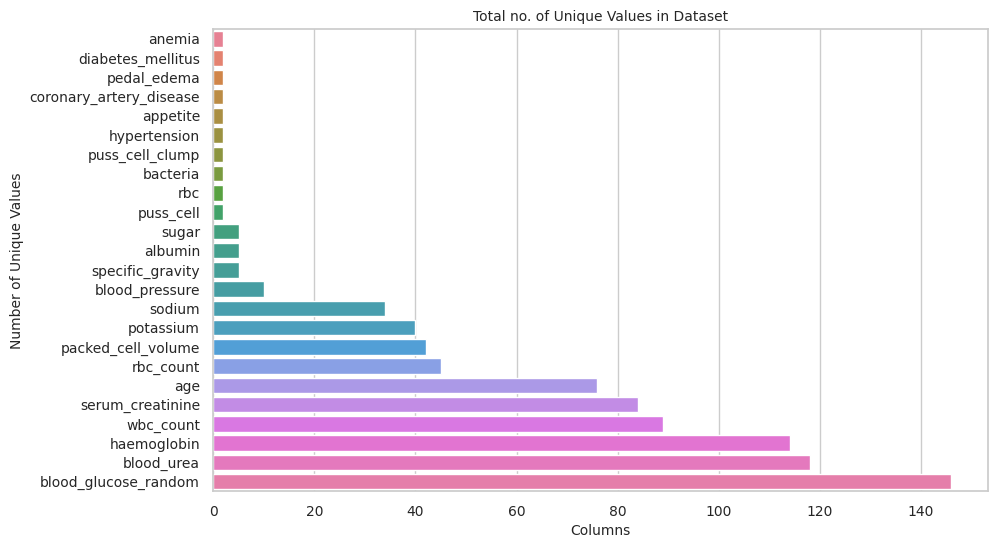

In [28]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)
# Create a bar plot or count plot of unique values
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(y=unique_counts.index, x=unique_counts.sort_values(),palette='husl' )

    plt.xticks(rotation=0, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df.iloc[:,0:-1])

diabetes_mellitus  hypertension
no                 no              222
                   yes              41
yes                no               31
                   yes             106
Name: classification, dtype: int64


<Axes: xlabel='diabetes_mellitus,hypertension'>

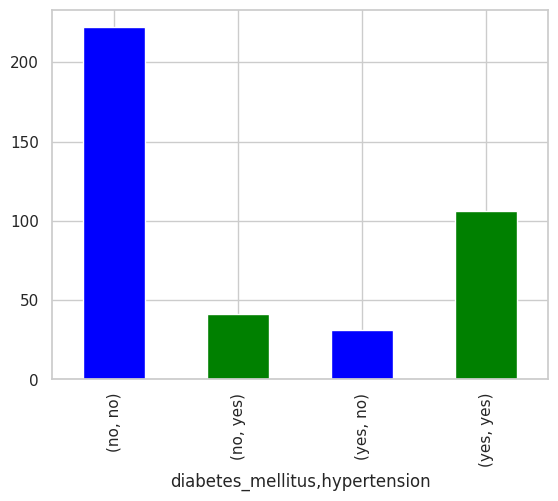

In [29]:
grouped_data1 = df.groupby(['diabetes_mellitus','hypertension'])['classification'].count()
print(grouped_data1)
grouped_data1.plot(kind ='bar', stacked =True,color=['blue','green'])






In [30]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'rbc',
       'puss_cell', 'puss_cell_clump', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'wbc_count', 'rbc_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

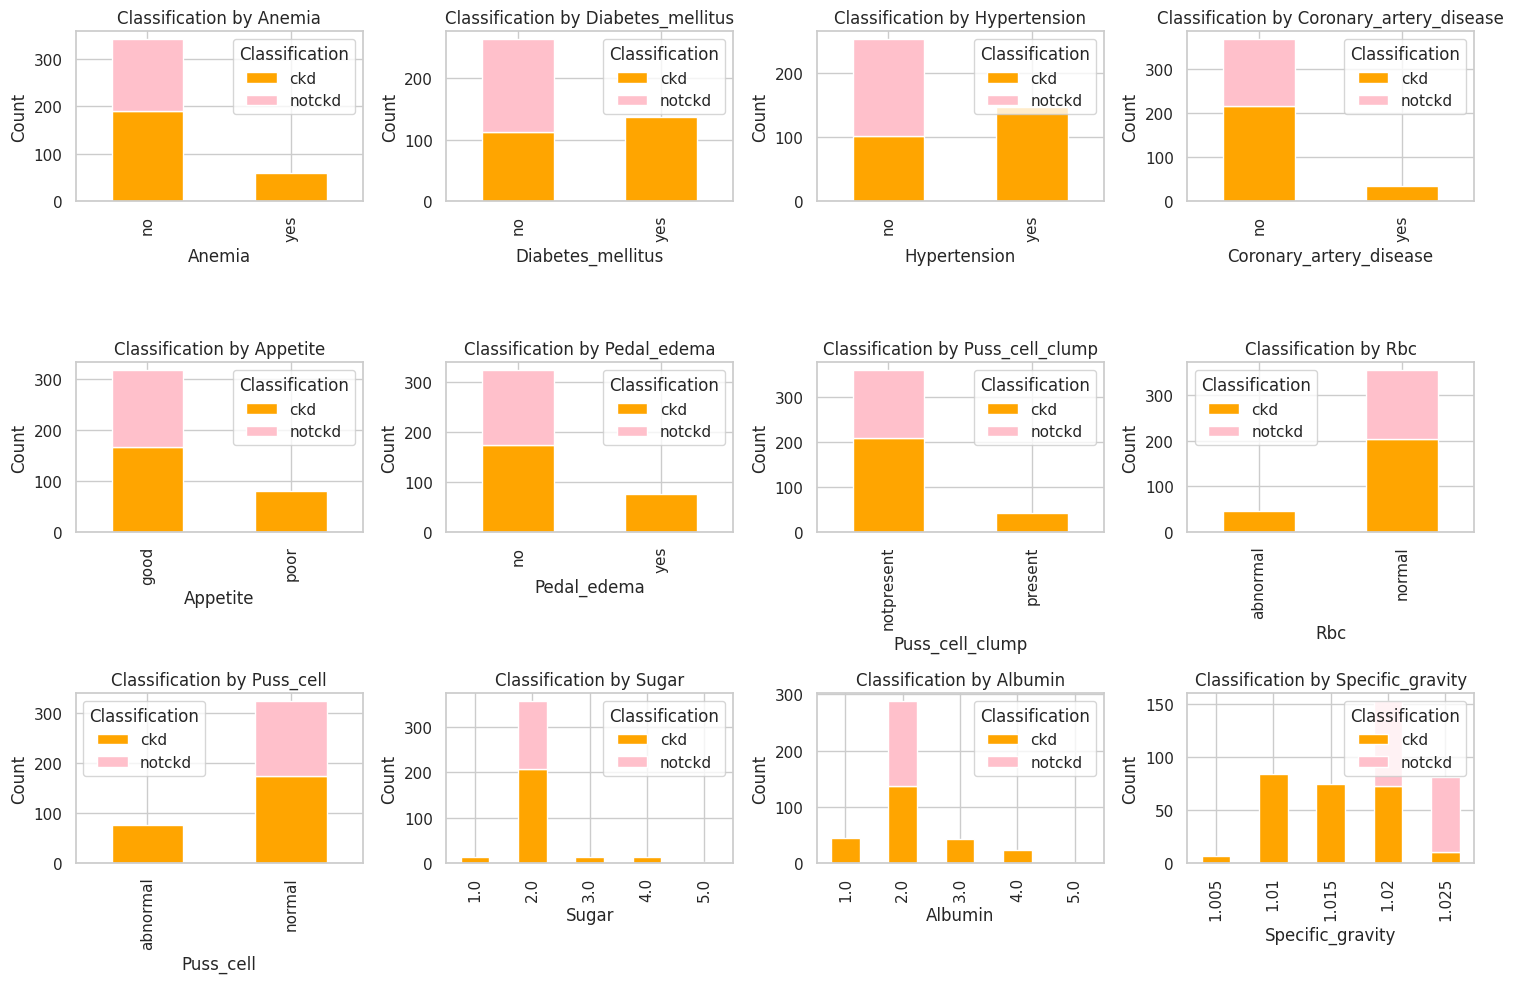

In [31]:
cat_col=['anemia','diabetes_mellitus', 'hypertension','coronary_artery_disease', 'appetite', 'pedal_edema', 'puss_cell_clump','rbc','puss_cell','sugar', 'albumin','specific_gravity']
target_var = 'classification'

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Loop through categorical columns
for i, col in enumerate(cat_col):
    cross_tab = pd.crosstab(df[col], df[target_var])

    # Create a stacked bar plot
    cross_tab.plot(kind='bar', stacked=True, color=['orange', 'pink'], ax=axes[i])

    # Adding labels and title
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{target_var.capitalize()} by {col.capitalize()}')

    # Adding legend
    axes[i].legend(title=target_var.capitalize())

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()








#Visualizing Categorical Attribute Distributions in Kidney Dataset

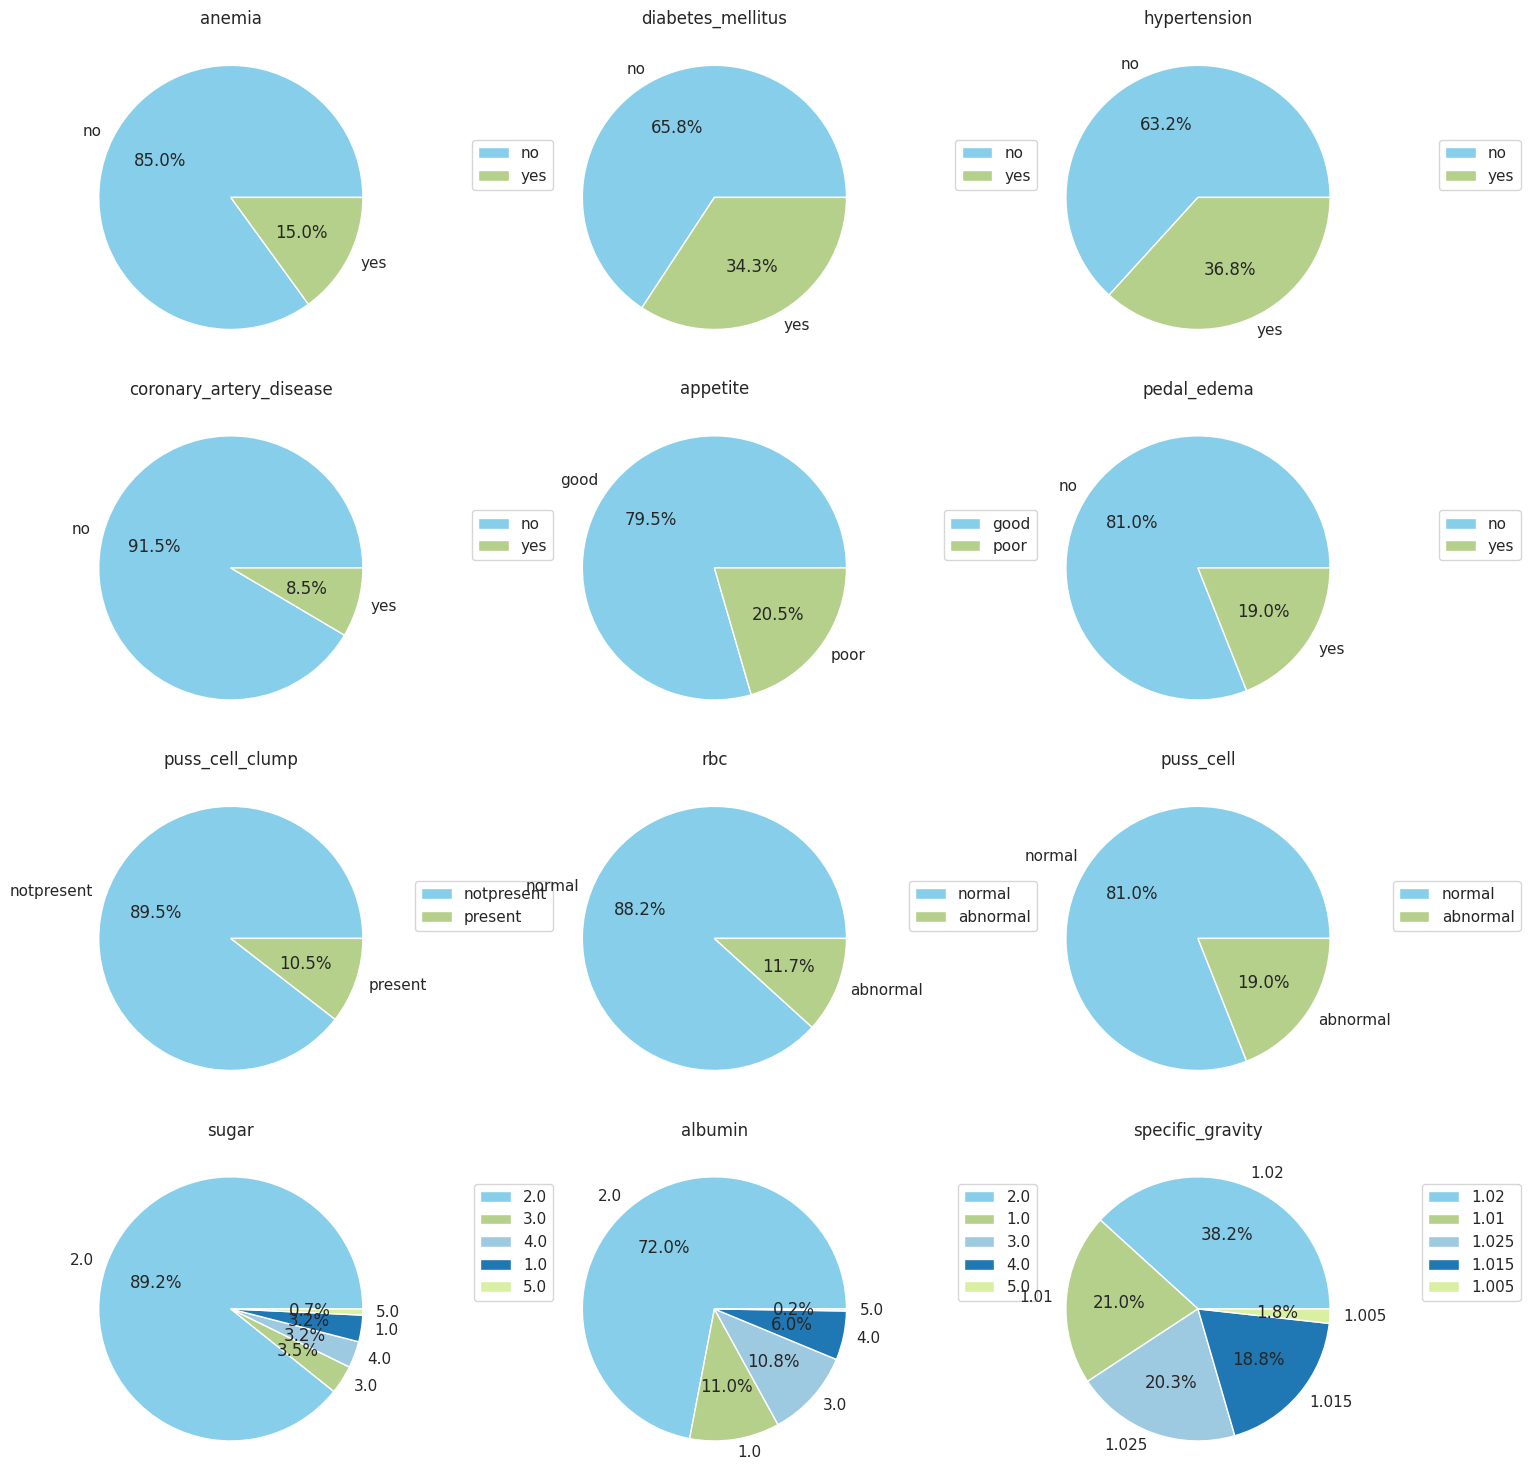

In [32]:
plt.figure(figsize=(15,15))
for i, col in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    colors = ['skyblue','#b5d08a','#9ecae1','#1f77b4','#d9f0a3']
    df[col].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%' )
    plt.title(f'{col}')
    plt.legend(loc='lower right',bbox_to_anchor=(1.5, 0.5))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Distribution of Categorical Attributes for Kidney Disease (CKD) Cases

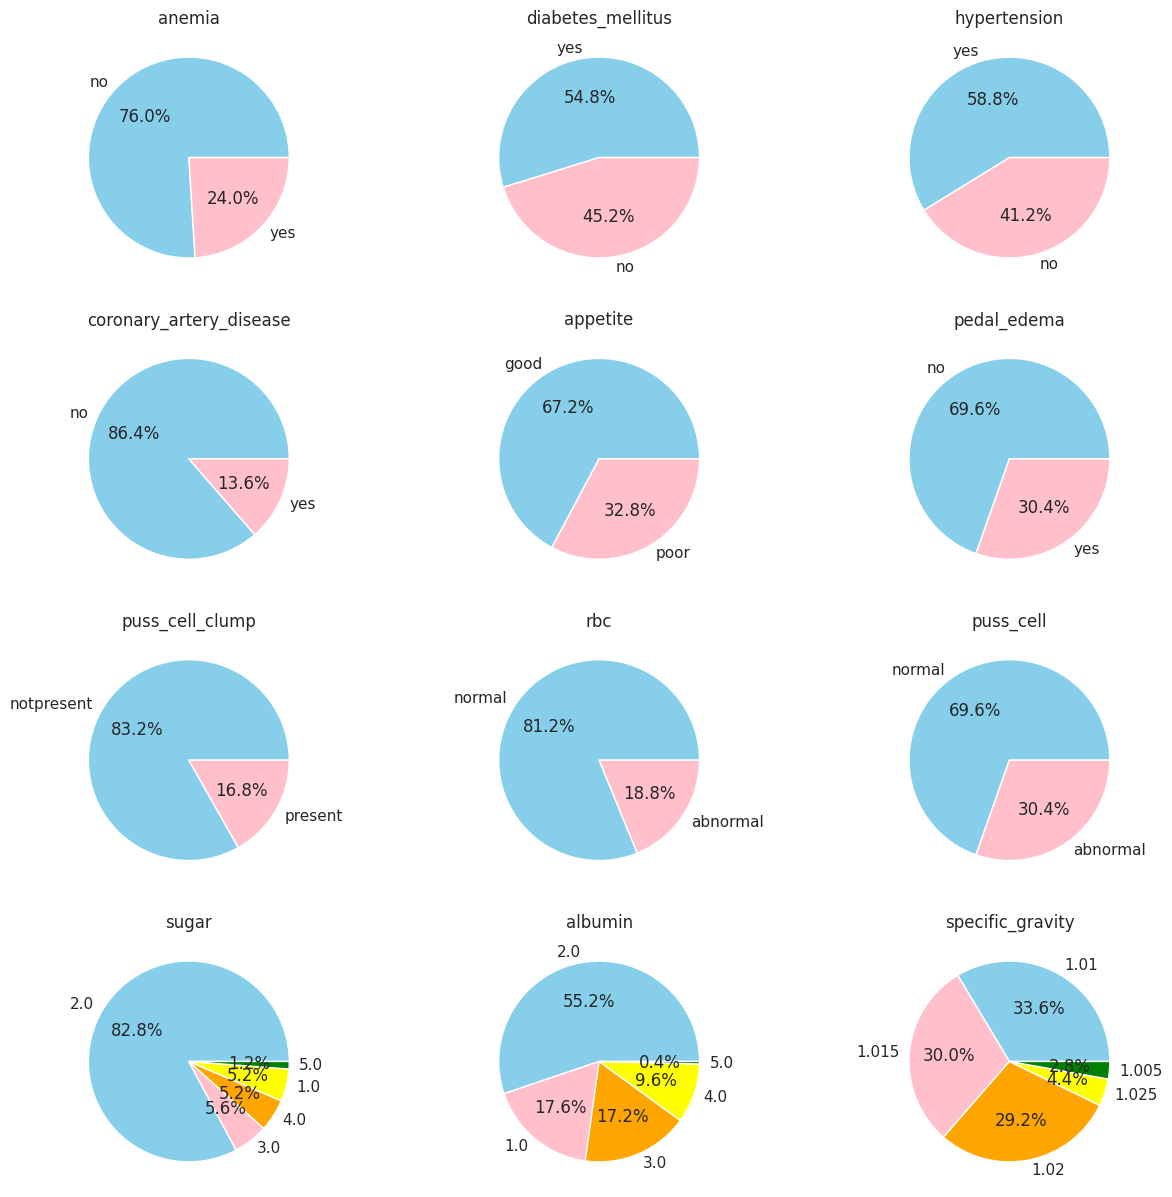

In [33]:
plt.figure(figsize=(15,15))
for i, col in enumerate(cat_col):
    colors =['skyblue','pink', 'orange', 'yellow','green',]
    plt.subplot(4,3,i+1)
    df[(df.classification =='ckd')][col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors =colors)
    plt.title(f'{col}')
    plt.ylabel('')

# Te total count of diabetic and non-diabetic in the dataset and  having kidney disease:

The plotted pie charts vividly illustrate the distribution of positive ("ckd") and negative ("notckd") classifications within various categorical attributes, revealing insights into the prevalence of kidney disease across distinct categories.

total count of diabetic and non diabatic  :no     263
yes    137
Name: diabetes_mellitus, dtype: int64
------------------------------------------------------------------------------------------
Count of daibetic  and non-diabetic in the dataset having kidney disease : yes    137
no     113
Name: diabetes_mellitus, dtype: int64


<Axes: >

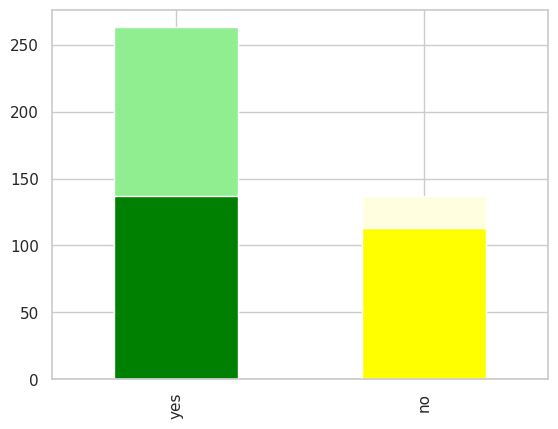

In [34]:
diabetic_count = df['diabetes_mellitus'].value_counts()
kidney_diabetic_count =df[(df.classification =='ckd')]['diabetes_mellitus'].value_counts()
print('==='*30)
print(f'total count of diabetic and non diabatic  :{diabetic_count}')
print('---'*30)
print(f'Count of daibetic  and non-diabetic in the dataset having kidney disease : {kidney_diabetic_count}')
print('==='*30)

diabetic_count.plot( kind='bar',  color=['lightgreen','lightyellow',], )

kidney_diabetic_count.plot( kind='bar',  color=[ 'green','yellow', ])

#  Kidney Disease Cases by Age

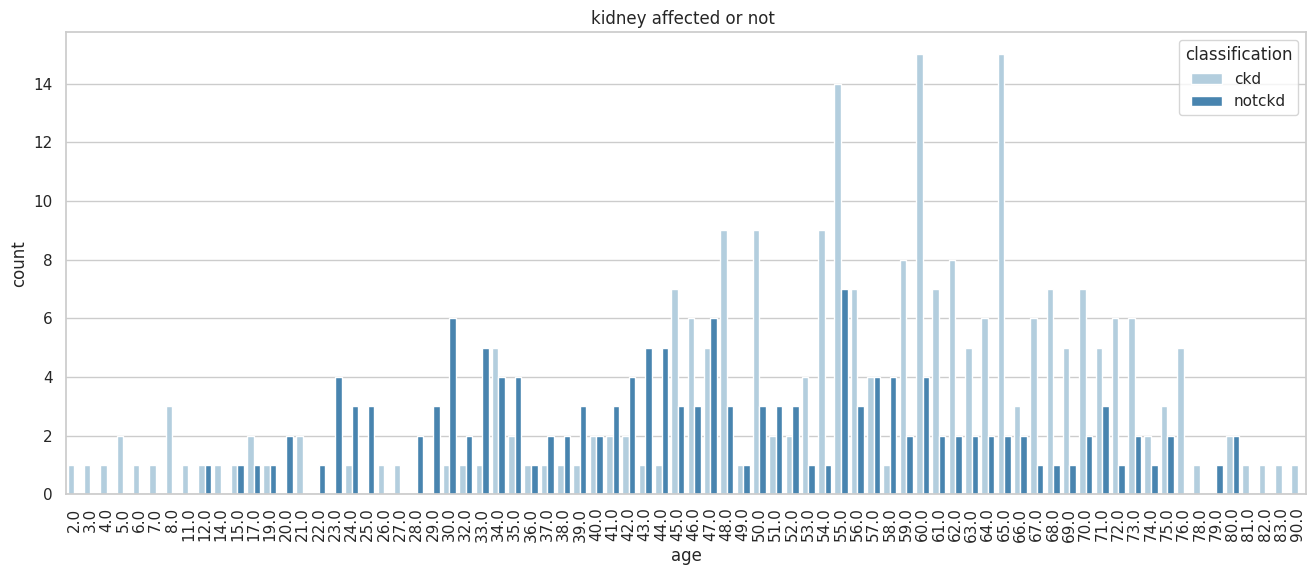

In [35]:
kidney_age = df[['age','classification']]
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= kidney_age['age'], hue= kidney_age['classification'] , palette ='Blues',)
ax.set_title('kidney affected or not ')
plt.show()

# Children having ckd or notckd

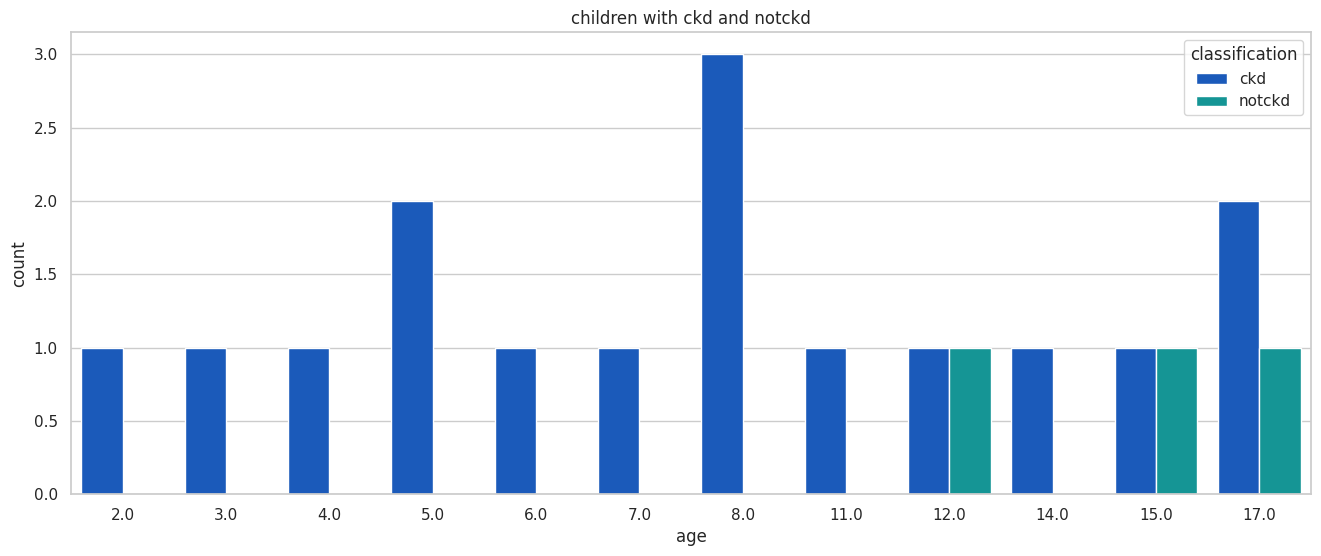

In [36]:
kidney_children = df[(df['age']<=18)][['age','classification']]
plt.figure(figsize=(16,6))
plt.xticks(rotation = 00)
ax = sns.countplot(x= kidney_children['age'] , hue= kidney_children['classification'], palette ='winter')
ax.set_title('children with ckd and notckd')
plt.show()

## Distribution

In [37]:
def num_dist(column, target= 'classification'):
    plt.figure(figsize=(12,4))
    plt.subplot(1,4,1)
    sns.boxplot(x=target,y=column, data=df, palette="Set1")
    plt.title(f"{column.title()} vs classification")

    plt.subplot(1,4,2)
    sns.violinplot(x=target, y=column, data=df,palette='Set1',)


    plt.subplot(1,4,3)
    sns.swarmplot(x=target, y=column, data=df,palette='Set1',)

    plt.subplot(1,4,4)
    sns.kdeplot(data=df,x=column,hue= target, palette="Set1")
    plt.title(f"Distribution of {column.title()} ")
    plt.tight_layout()
    plt.show()

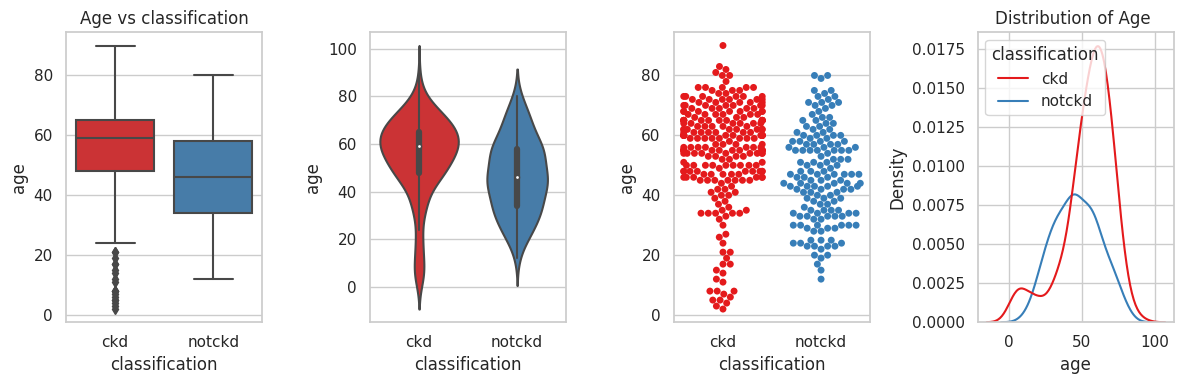

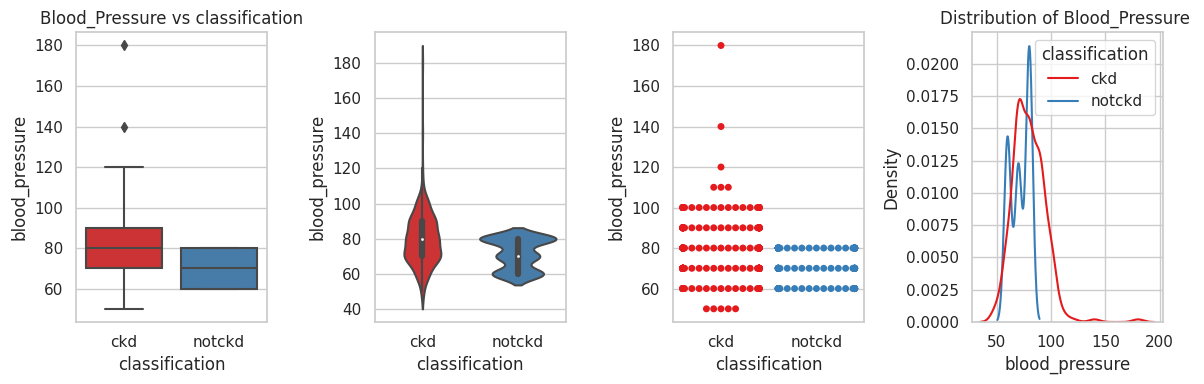

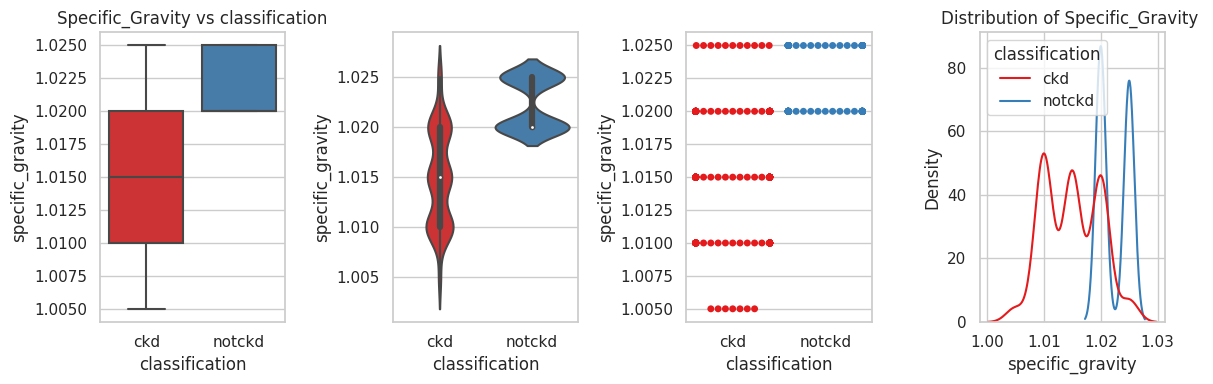

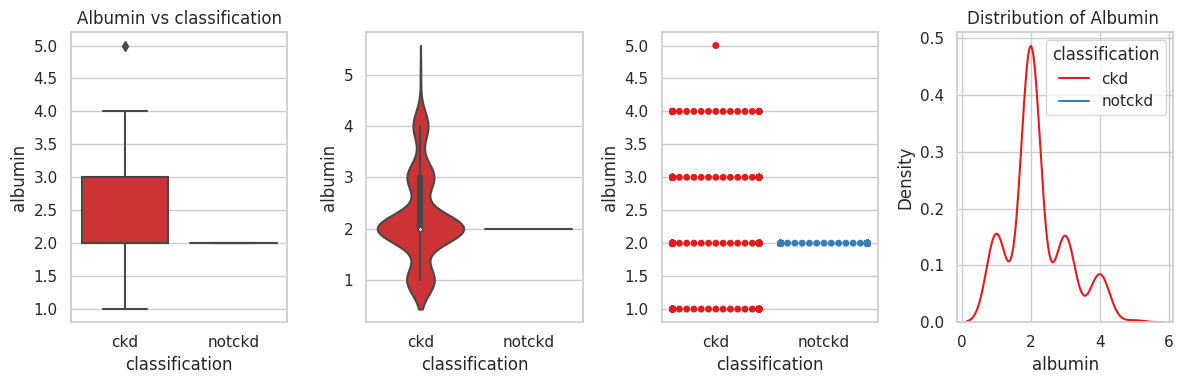

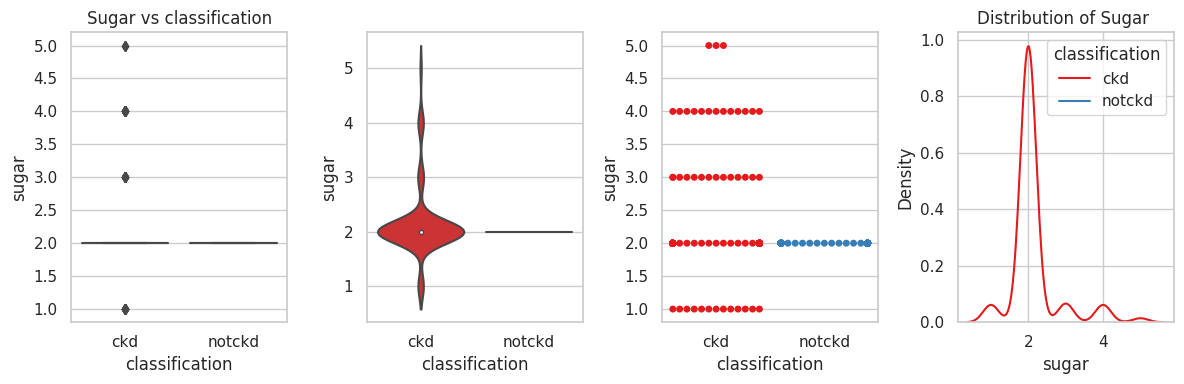

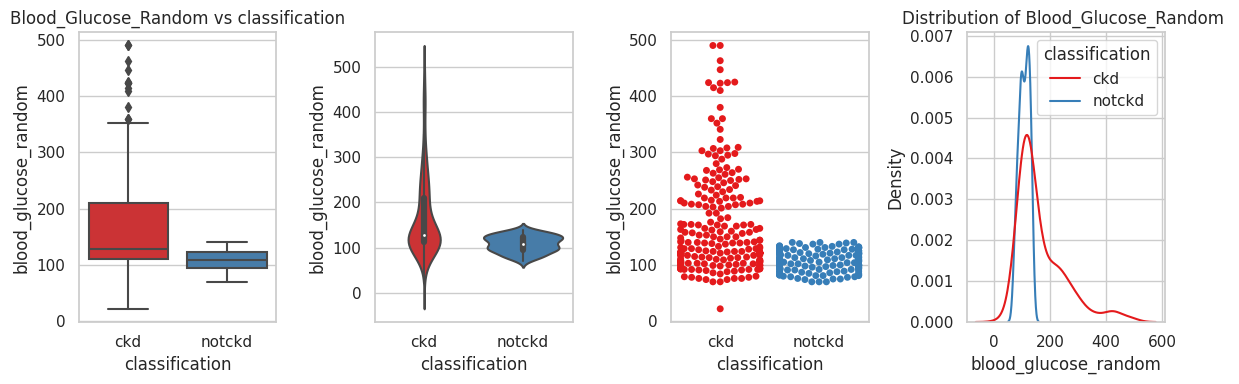

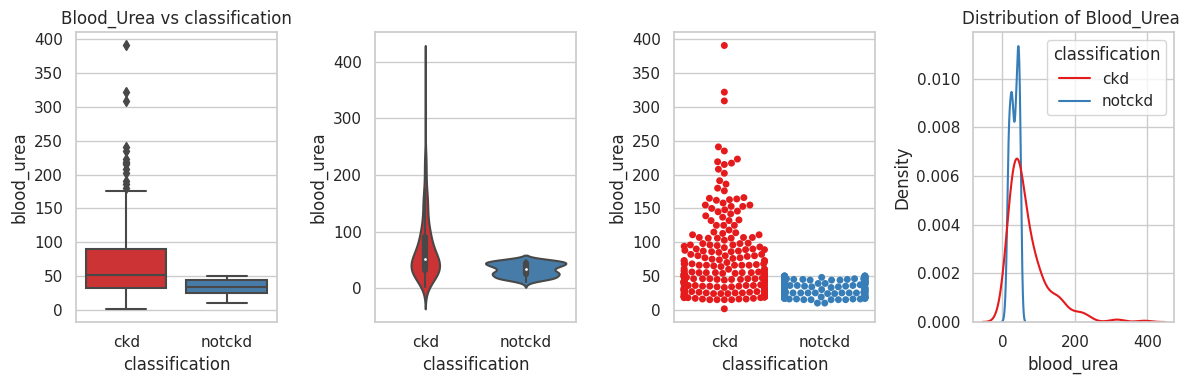

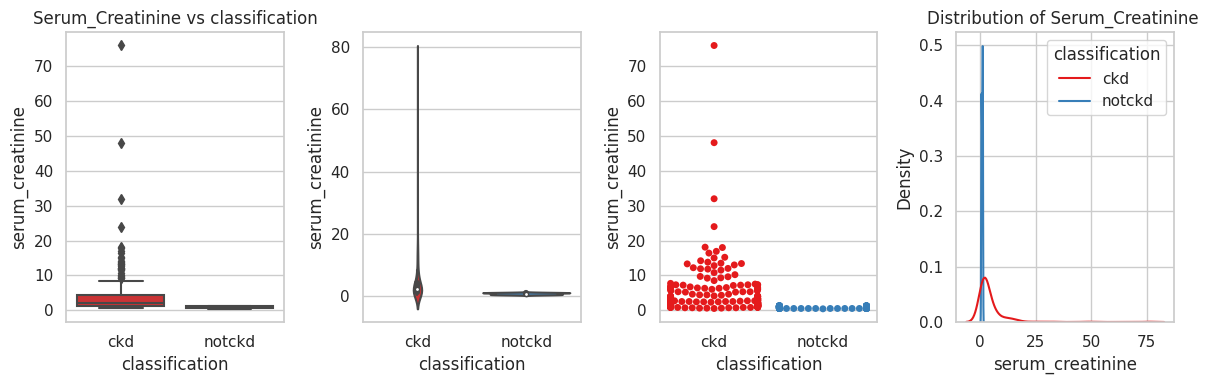

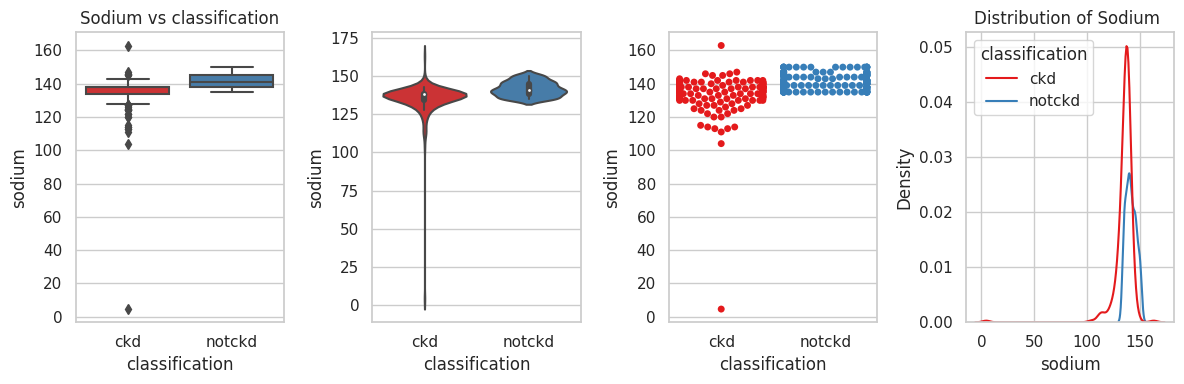

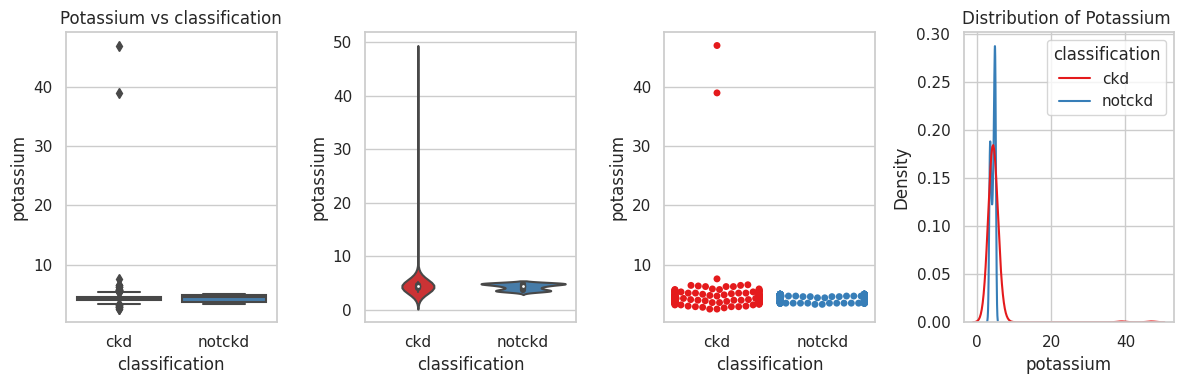

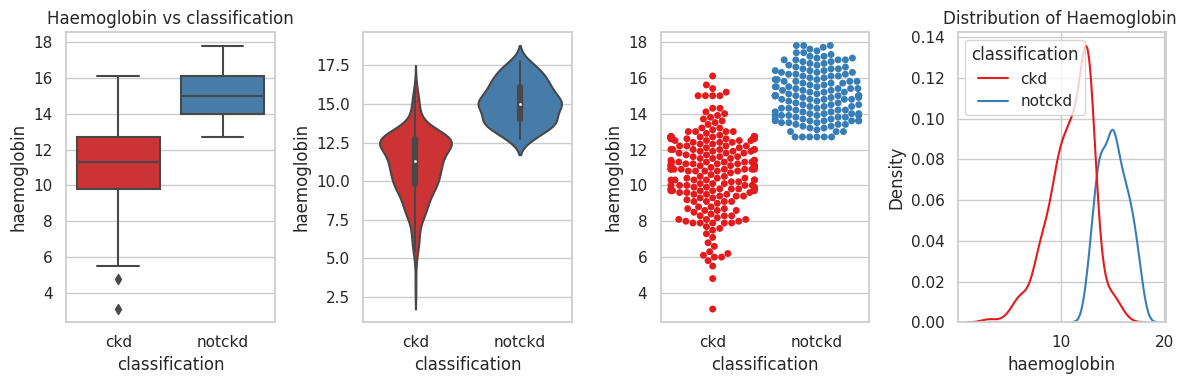

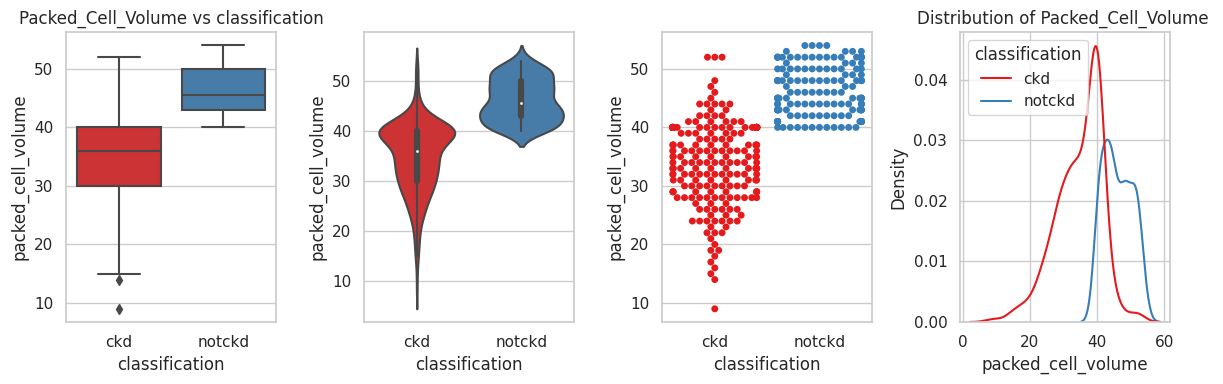

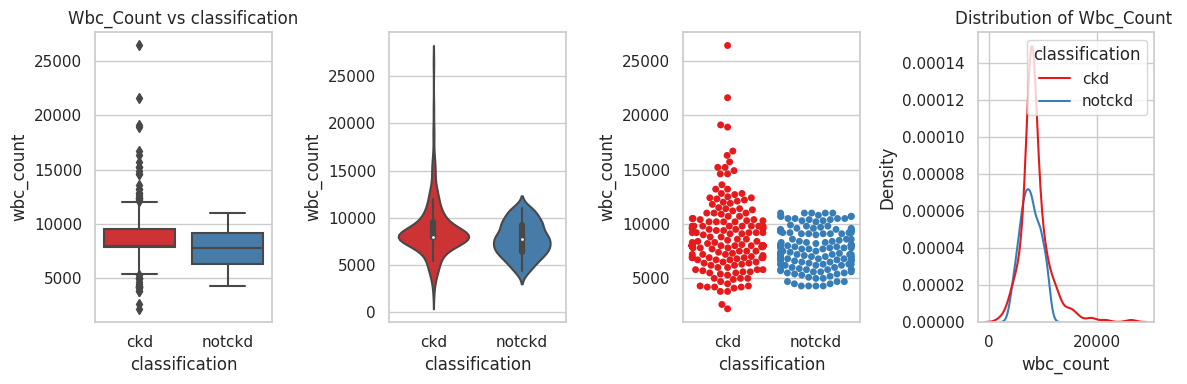

In [38]:
num_col = df.select_dtypes(include='number').columns
for col in num_col[:-1]:
    num_dist(col)

# Outlier Treatment : Not performed as it is a clinical dataset

In [39]:
num_col

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume', 'wbc_count',
       'rbc_count'],
      dtype='object')

# Bivariate analysis of dependent variables:

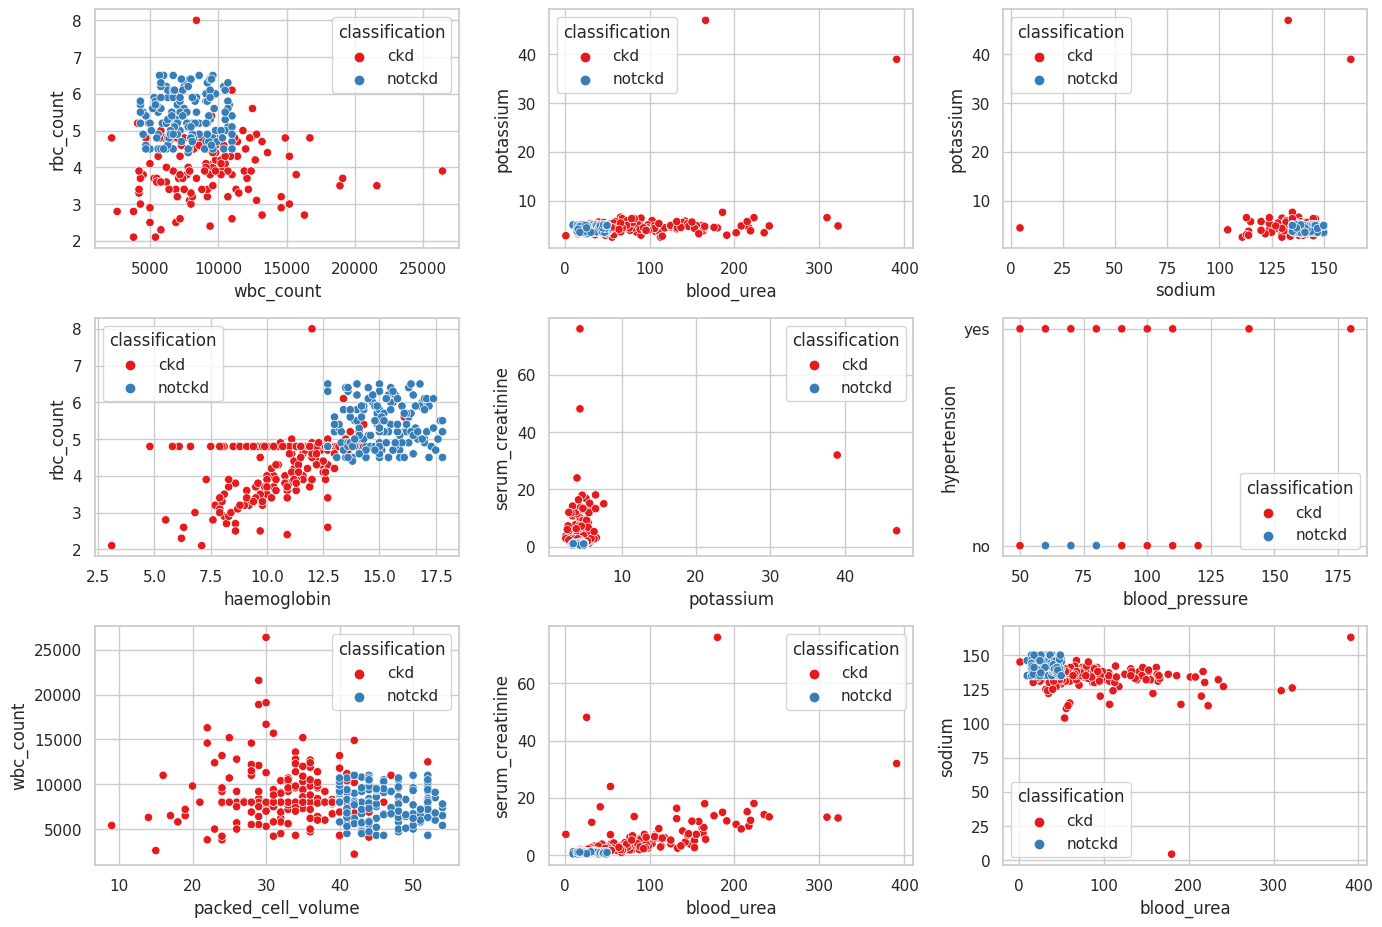

In [40]:
plt.figure(figsize=(14,12))
plt.subplot(4,3,1)
sns.scatterplot(data=df, x='wbc_count', y='rbc_count', hue='classification', palette ='Set1')
plt.subplot(4,3,2)
sns.scatterplot(data=df, x='blood_urea', y='potassium', hue='classification', palette ='Set1')
plt.subplot(4,3,3)
sns.scatterplot(data=df, x='sodium', y='potassium', hue='classification', palette ='Set1')
plt.subplot(4,3,4)
sns.scatterplot(data=df, x='haemoglobin', y='rbc_count', hue='classification', palette ='Set1')
plt.subplot(4,3,5)
sns.scatterplot(data=df, y='serum_creatinine', x='potassium', hue='classification', palette ='Set1')
plt.subplot(4,3,6)
sns.scatterplot(data=df, x='blood_pressure', y='hypertension', hue='classification', palette ='Set1')
plt.subplot(4,3,7)
sns.scatterplot(data=df, x='packed_cell_volume', y='wbc_count', hue='classification', palette ='Set1')
plt.subplot(4,3,8)
sns.scatterplot(data=df, x='blood_urea', y='serum_creatinine', hue='classification', palette ='Set1')
plt.subplot(4,3,9)
sns.scatterplot(data=df, x='blood_urea', y='sodium', hue='classification', palette ='Set1')
plt.tight_layout()

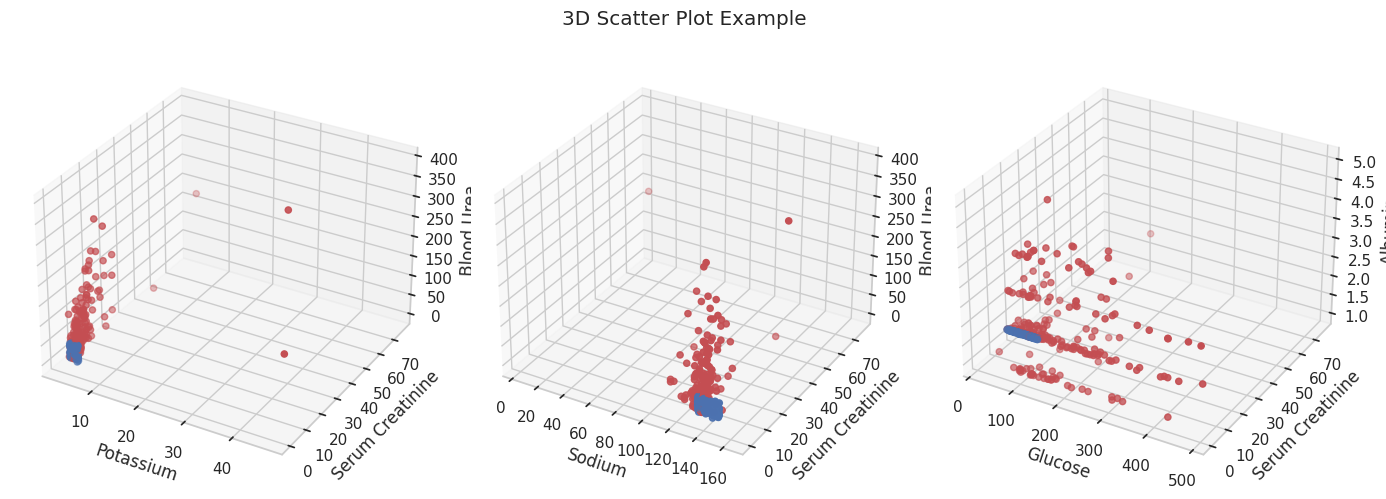

In [41]:


fig = plt.figure(figsize=(14, 5))
color = df['classification'].map({'ckd': 'r', 'notckd': 'b'})

ax1 = fig.add_subplot(131, projection='3d')

x, y, z = df.potassium, df.serum_creatinine, df.blood_urea
ax1.scatter(x, y, z, marker='o', c=color, cmap='viridis')
ax1.set_xlabel('Potassium')
ax1.set_ylabel('Serum Creatinine')
ax1.set_zlabel('Blood Urea')


ax2 = fig.add_subplot(132, projection='3d')

x, y, z = df.sodium, df.serum_creatinine, df.blood_urea
ax2.scatter(x, y, z, marker='o', c=color, cmap='viridis')
ax2.set_xlabel('Sodium')
ax2.set_ylabel('Serum Creatinine')
ax2.set_zlabel('Blood Urea')

ax3 = fig.add_subplot(133, projection='3d')

x, y, z = df.blood_glucose_random , df.serum_creatinine, df.albumin
ax3.scatter(x, y, z, marker='o', c=color, cmap='viridis')
ax3.set_xlabel('Glucose')
ax3.set_ylabel('Serum Creatinine')
ax3.set_zlabel('Albumin')


fig.suptitle('3D Scatter Plot Example')
plt.tight_layout()

plt.show()

 <h2 style='; font-weight: bold; font-size:200%; color:blue'> 📊 Checking Imbalance between the different classes</h2>

ckd       250
notckd    150
Name: classification, dtype: int64


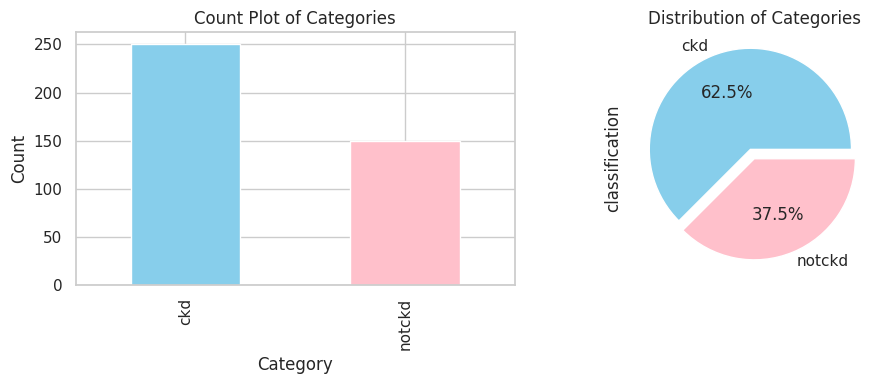

In [42]:
value_counts =df.classification.value_counts()
print(value_counts)


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the bar plot on the first subplot (axes[0])
value_counts.plot(kind='bar', ax=axes[0],color=['skyblue', 'pink'])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot of Categories')

plt.subplot(1,2,1)
value_counts.plot(
    kind='pie',
    ax=axes[1],
    explode=[ 0.1,0],     # Explode the second category to emphasize it
    autopct='%1.1f%%',         # Display percentage with one decimal place
    #shadow=True,               # Add a shadow effect to the chart
    colors=['skyblue', 'pink']  # Custom colors for the pie chart
)
axes[1].set_title('Distribution of Categories')


plt.tight_layout()

plt.show()

### </h2><font color=blue> ** Imbalancy in dataset found** </h2>


* A little **class-imbalance** in the target feature is observed.
* In this project imbalancy is not handeled.


<h2 style='; font-weight: bold; font-size:200%; color:blue'> 🛠️🧱⛏️ Model Building Predict Data and Evaluation of Model</h2>


# Sklearn Libraries

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve , auc
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB

##  Encoding

In [44]:
for col in df.columns:
    if df[col].nunique()<6:
        df[col]=df[col].astype('category')
        df[col] =df[col].cat.codes



## Splitting into target and independent features

In [45]:
target = "classification"
x = df.drop(columns=target)
y = df[target]

## Correlation between independent features

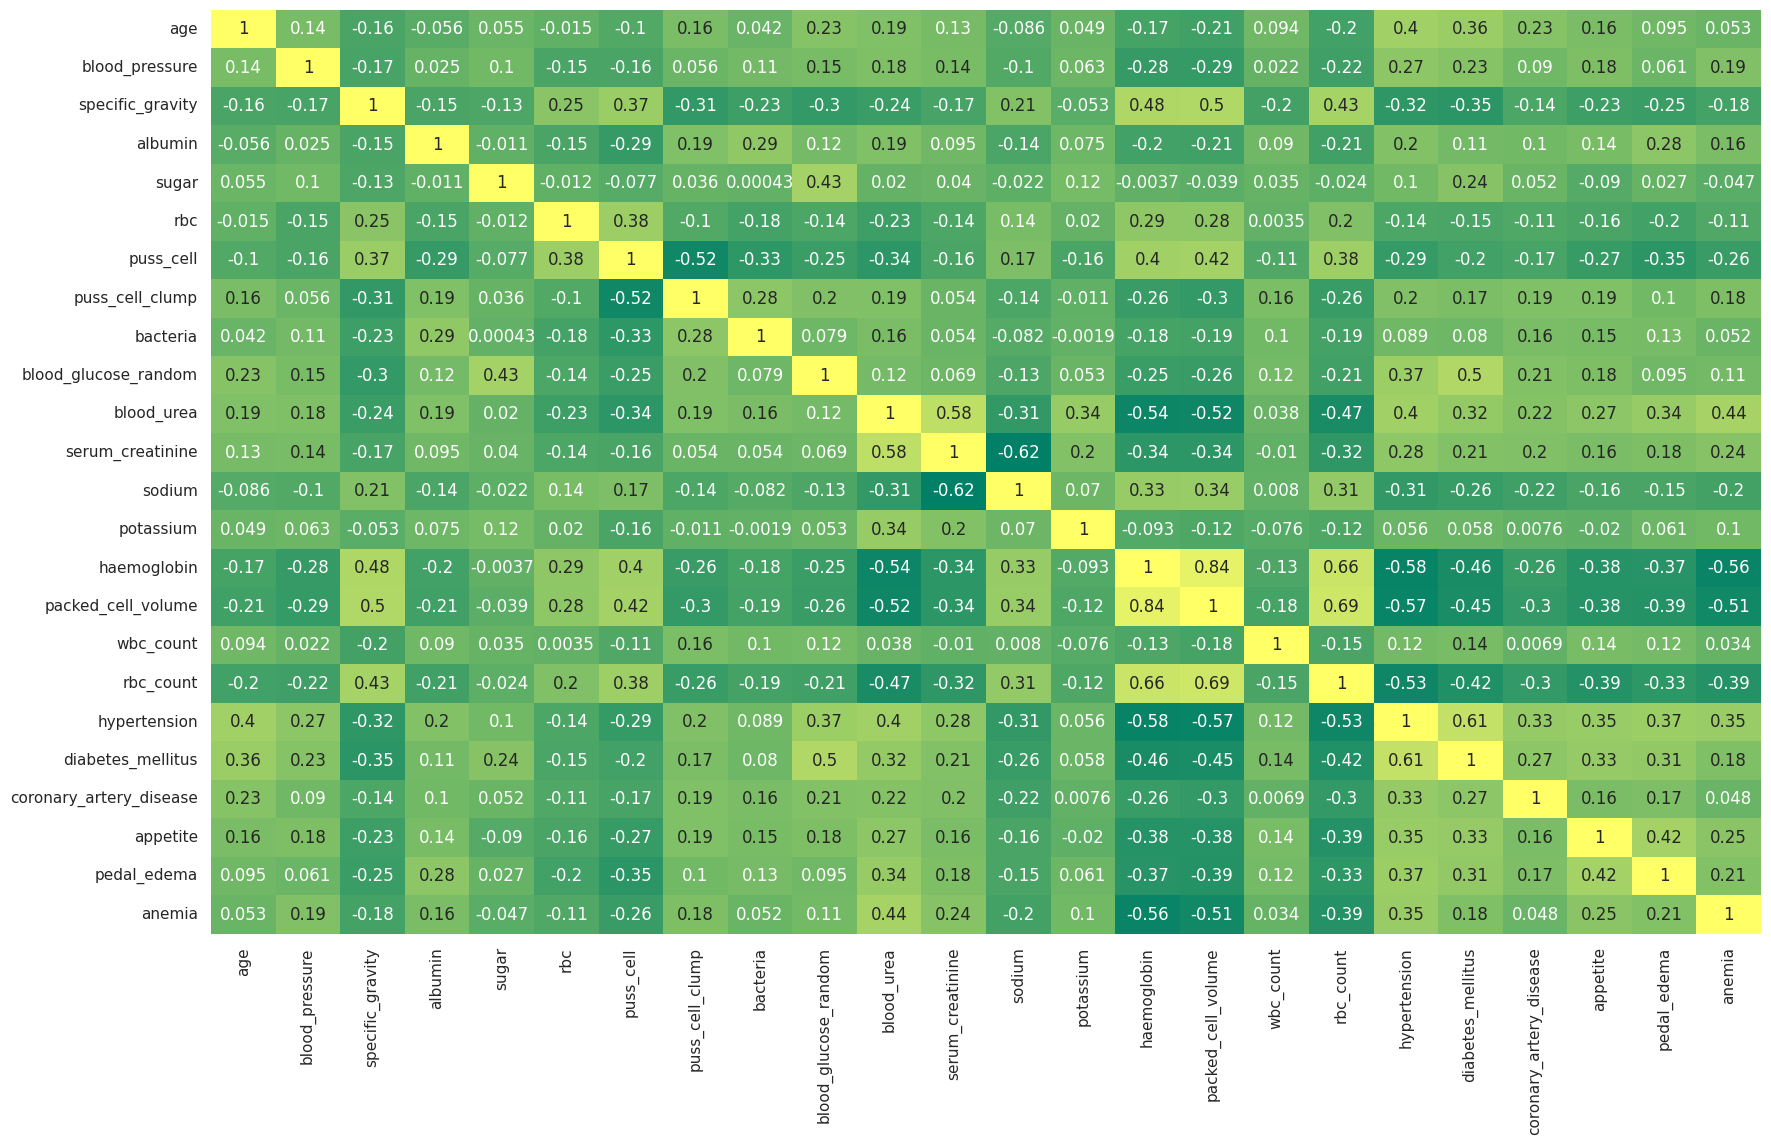

In [46]:
plt.figure(figsize=(20,12))
corr = x.corr()
sns.heatmap(corr, annot=True, cmap='summer',cbar=False)
plt.show()

## Feature Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler((-1,1))
msc_x = pd.DataFrame(msc.fit_transform(x) , columns=x.columns)
msc_x.head()

age  blood_pressure  specific_gravity  albumin  sugar  rbc  puss_cell  \
0  0.045455       -0.538462               0.5     -1.0   -0.5  1.0        1.0   
1 -0.886364       -1.000000               0.5      0.5   -0.5  1.0        1.0   
2  0.363636       -0.538462              -0.5     -0.5    0.0  1.0        1.0   
3  0.045455       -0.692308              -1.0      0.5   -0.5  1.0       -1.0   
4  0.113636       -0.538462              -0.5     -0.5   -0.5  1.0        1.0   

   puss_cell_clump  bacteria  blood_glucose_random  ...  haemoglobin  \
0             -1.0      -1.0             -0.576923  ...     0.673469   
1             -1.0      -1.0             -0.576923  ...     0.115646   
2             -1.0      -1.0              0.713675  ...    -0.115646   
3              1.0      -1.0             -0.594017  ...     0.102041   
4             -1.0      -1.0             -0.641026  ...     0.156463   

   packed_cell_volume  wbc_count  rbc_count  hypertension  diabetes_mellitus  \
0            0.555556  -0.537190   0.050847           1.0                1.0   
1            0.288889  -0.685950  -0.084746          -1.0               -1.0   
2           -0.022222  -0.561983  -0.084746          -1.0                1.0   
3            0.022222  -0.628099  -0.389831           1.0               -1.0   
4            0.155556  -0.578512  -0.152542          -1.0               -1.0   

   coronary_artery_disease  appetite  pedal_edema  anemia  
0                     -1.0      -1.0         -1.0    -1.0  
1                     -1.0      -1.0         -1.0    -1.0  
2                     -1.0       1.0         -1.0     1.0  
3                     -1.0       1.0          1.0     1.0  
4                     -1.0      -1.0         -1.0    -1.0  

[5 rows x 24 columns]

## Imbalance treatment

In [48]:
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# over = RandomOverSampler()
# x_over, y_over = over.fit_resample(msc_x,y)
# smote = SMOTE()
# x_over, y_over = smote.fit_resample(sc_x,y)

#==============================================
#       No imbalance treatment
#===============================================
y_over=y
x_over=x

In [49]:
y.value_counts()*100/len(y)

0    62.5
1    37.5
Name: classification, dtype: float64

### Here the imbalance treatment is not done as the ratio of majority to minority is approximately 62:37 .

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=123,  stratify = y_over)

# Models

## case 1: Logistic Regression

In [51]:
logit = LogisticRegression()

## case 2: Decision Tree

In [52]:
dtc = DecisionTreeClassifier()

## case 3: Bagging

In [53]:
bag = BaggingClassifier( )

## case 4: RandomForest

In [54]:
rfc  = RandomForestClassifier()

## case-5 : KNearestNeighbour

In [55]:
knn = KNeighborsClassifier()

### case-6 : SupportVectorMachine

In [56]:
# #kernel - linear
svm_linear = SVC(kernel='linear')

# #kernel - poly
svm_poly = SVC(kernel='poly',)

# #kernel - sigmoid
svm_sigmoid = SVC(kernel='sigmoid',)

# #kernel - rbf
svm_rbf = SVC(kernel='rbf', )

svc = svm_linear

## case-7 Boosting Classifier

In [57]:
xgb =XGBClassifier()
gdb =GradientBoostingClassifier()
ada =AdaBoostClassifier()


## case-8: Naive Bayes

In [58]:
gnb = GaussianNB()
bnb = BernoulliNB()

## case 9: Voting Classifier

In [59]:
estimators_list =[
          ('Logistic',logit, ),
          ('DecisionTree',dtc, ),
          ('Bagging',bag,),
          ('RandomForest',rfc, ),
           ('KNearestNeighbour',knn),
          ('SVM',svc),
          ('AdaBoost', ada),
          ('GradientBoost',gdb),
          ('XGBoost',xgb),
          ('GaussianNB', gnb),
          ('BernoulliNB', bnb)
                    ]
vc = VotingClassifier(estimators = estimators_list, voting='hard',)

## Evaluation of all models

In [60]:
estimators =[
           ('Logistic',logit, ),
           ('DecisionTree',dtc, ),
           ('Bagging',bag,),
           ('RandomForest',rfc, ),
           ('KNearestNeighbour',knn),
           ('SVM',svc),
           ('AdaBoost', ada),
           ('GradientBoost',gdb),
           ('XGBoost',xgb),
           ('GaussianNB', gnb),
           ('BernoulliNB', bnb),
           ('Voting',vc)
          ]

for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print('==='*10)
    print(model_name)
    print('==='*10)
#=======================================================
#            Cross Validation
#--------------------------------------------------------
    CV_train_acc =(cross_val_score(model, x_train, y_train, cv =10).mean()).round(2)*100
    CV_test_acc =(cross_val_score(model, x_test, y_test, cv =10).mean()).round(2)*100

    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc} %' )
    variance_CV = abs(CV_train_acc - CV_test_acc).round(2)

    print(f'Variance (CrossValidation) : {variance_CV}')
    if (variance_CV > 9) or (CV_train_acc > 99):
        print(f'ATTENTION : The  {model_name} Model is overfitting')



        print()

Logistic
▬ Training Accuracy(CrossValidation), 91.0 %
▬ TestAccuracy(CrossValidation), 91.0 %
Variance (CrossValidation) : 0.0
DecisionTree
▬ Training Accuracy(CrossValidation), 98.0 %
▬ TestAccuracy(CrossValidation), 95.0 %
Variance (CrossValidation) : 3.0
Bagging
▬ Training Accuracy(CrossValidation), 97.0 %
▬ TestAccuracy(CrossValidation), 97.0 %
Variance (CrossValidation) : 0.0
RandomForest
▬ Training Accuracy(CrossValidation), 99.0 %
▬ TestAccuracy(CrossValidation), 99.0 %
Variance (CrossValidation) : 0.0
KNearestNeighbour
▬ Training Accuracy(CrossValidation), 71.0 %
▬ TestAccuracy(CrossValidation), 64.0 %
Variance (CrossValidation) : 7.0
SVM
▬ Training Accuracy(CrossValidation), 97.0 %
▬ TestAccuracy(CrossValidation), 93.0 %
Variance (CrossValidation) : 4.0
AdaBoost
▬ Training Accuracy(CrossValidation), 99.0 %
▬ TestAccuracy(CrossValidation), 98.0 %
Variance (CrossValidation) : 1.0
GradientBoost
▬ Training Accuracy(CrossValidation), 98.0 %
▬ TestAccuracy(CrossValidation), 95.0 %
V

## ROC-AUC charecteristics

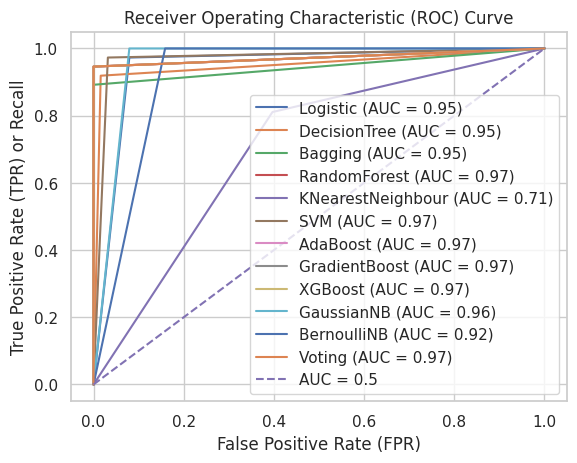

In [61]:
for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [ ]:

for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
#=====================================================
#           Evalutaion Metrics
#-----------------------------------------------------
    print( '--'*30)
    print( f'Classification_report:{model_name}\n')
#     print( '--'*30)
#     print( 'Train:')
#     print( classification_report(y_train, y_pred_train))
#    print( 'Test:')
    print( '--'*30)
    print(classification_report(y_test, y_pred_test))
    #print( '--'*30)

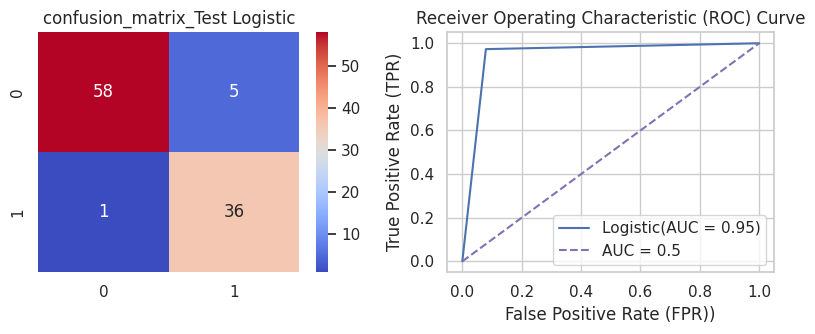

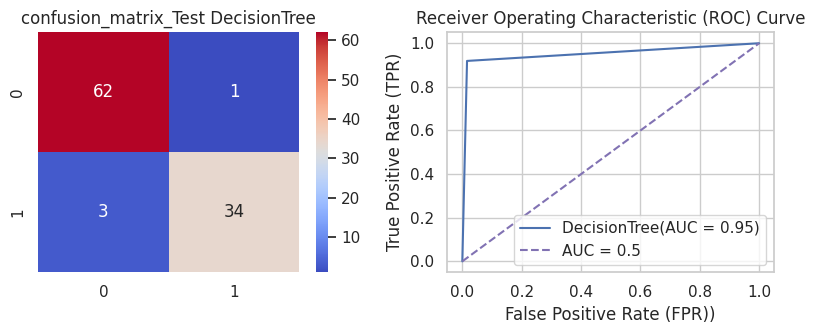

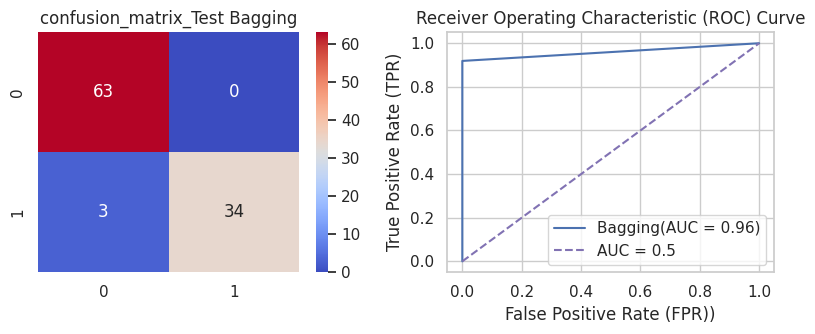

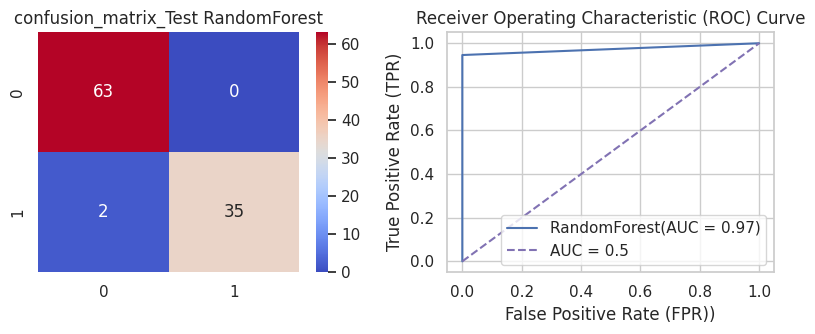

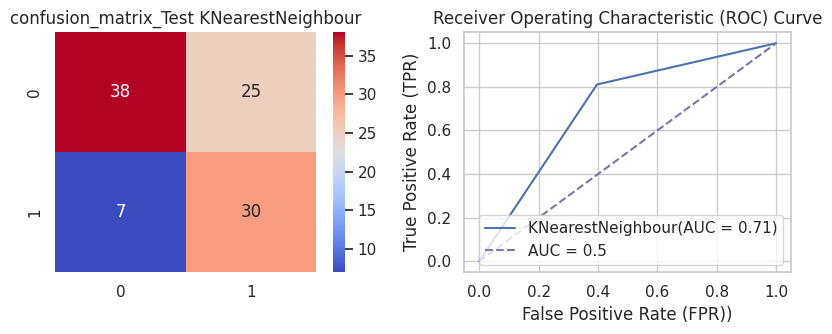

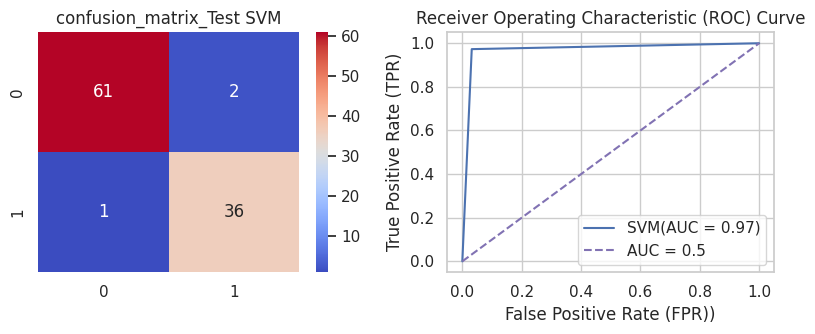

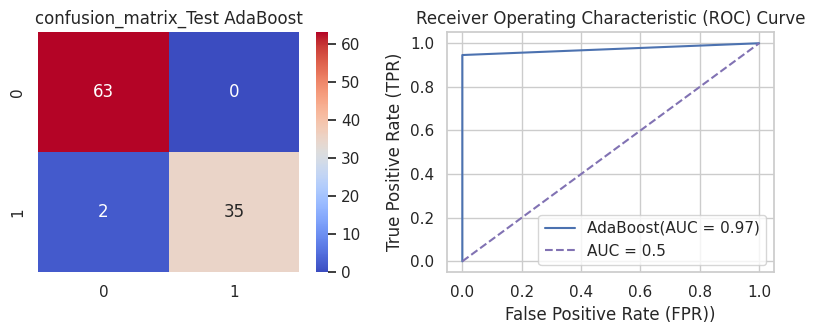

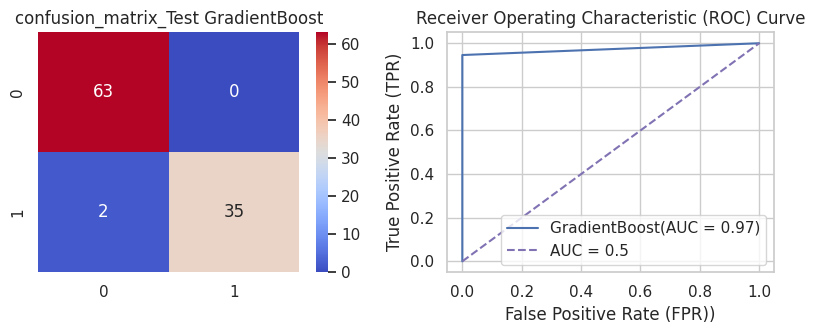

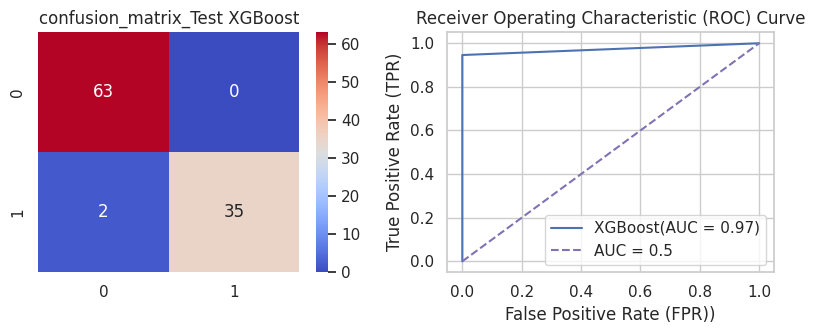

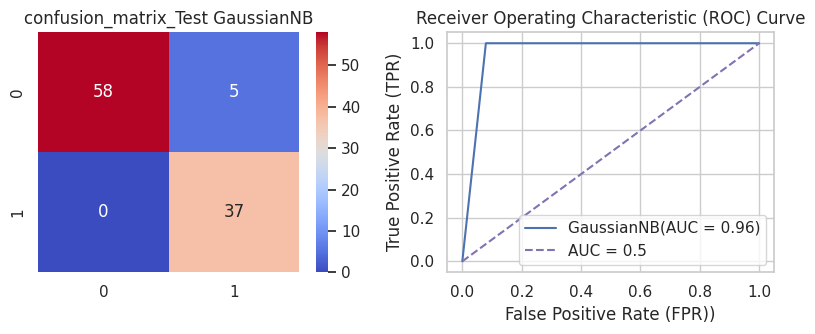

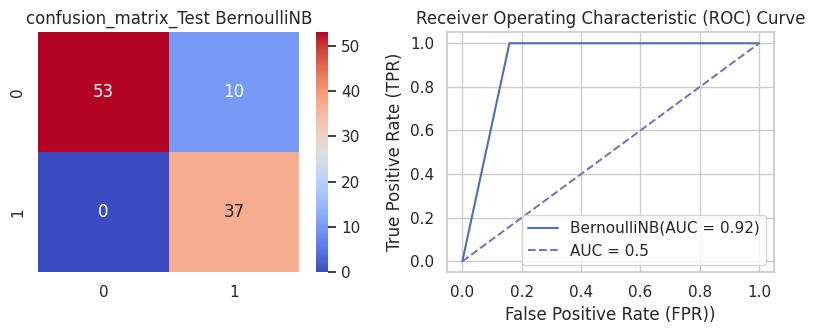

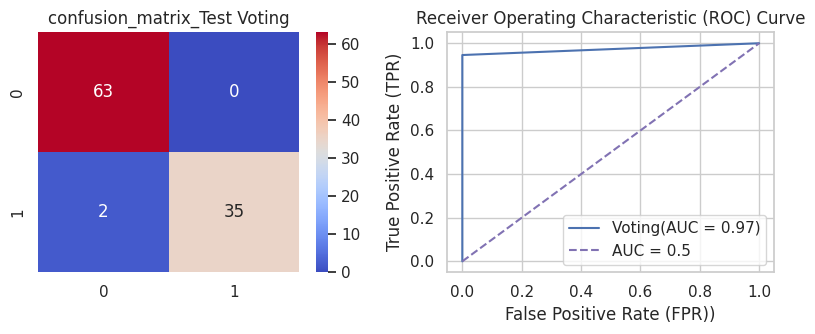

In [63]:
for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    cm_test = confusion_matrix(y_test, y_pred_test)

    #y_test_binary = (y_test == 1).astype(int)
    #y_pred_test_binary = (y_pred_test == 1).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
    roc_auc = auc(fpr, tpr)


    plt.figure(figsize = (8,3.5))
    plt.subplot(1,2,1)
    sns.heatmap(cm_test, annot = True, cmap= 'coolwarm')
    plt.title(f'confusion_matrix_Test {model_name}')

    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

    plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title

    plt.xlabel('False Positive Rate (FPR))')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

CV_acc =[]
ROC_AUC =[]
Precision=[]
Recall =[]
F1_score= []
for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    CV_acc.append((cross_val_score(model, x_test, y_test, cv =10).mean()).round(2)*100)
    Precision.append(precision_score(y_test,y_pred_test))
    Recall.append(recall_score(y_test,y_pred_test))
    F1_score.append(f1_score(y_test,y_pred_test))
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    ROC_AUC.append(auc(fpr, tpr))



**Summarising the model performances**

In [ ]:
metric ={ 'Test_Acc_CV' :CV_acc, 'Precision': Precision, 'Recall': Recall, 'F1_score' :F1_score,'ROC' : ROC_AUC}
row_label = [i[0] for i in estimators]
metric_df =pd.DataFrame(metric, index =row_label)
metric_df

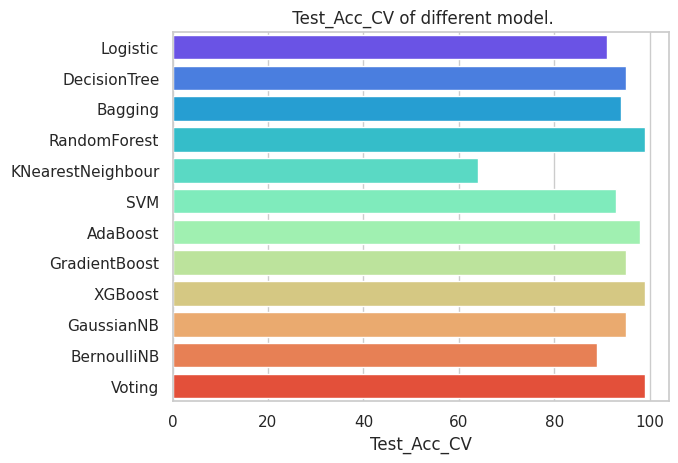

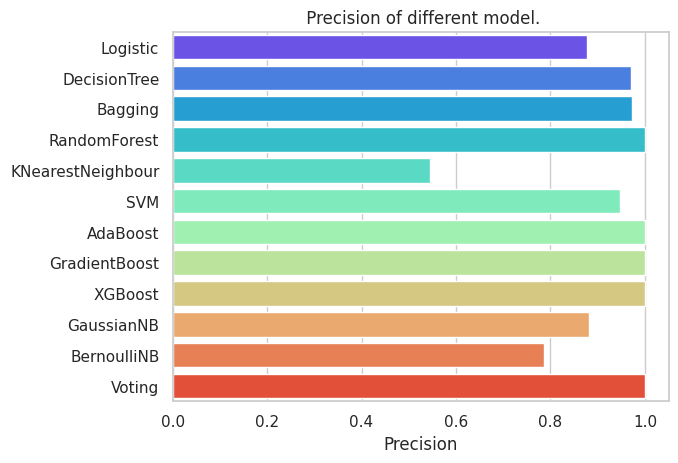

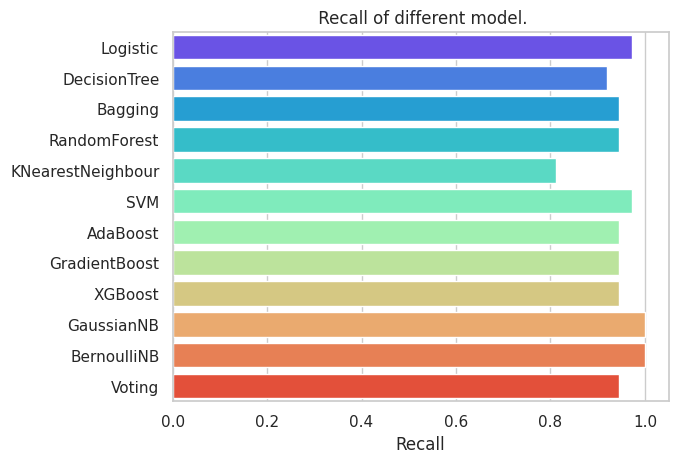

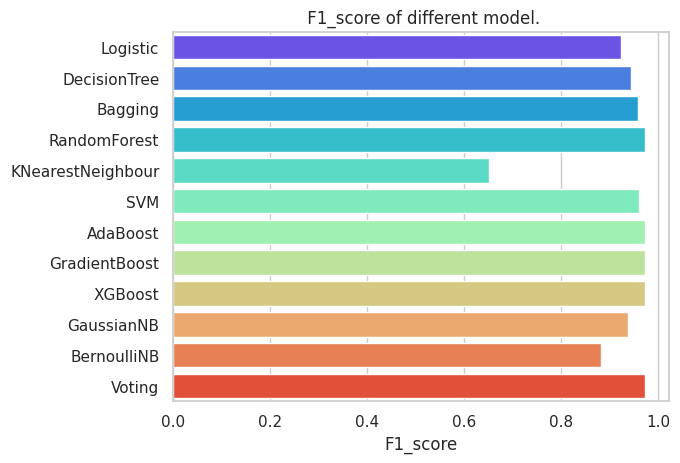

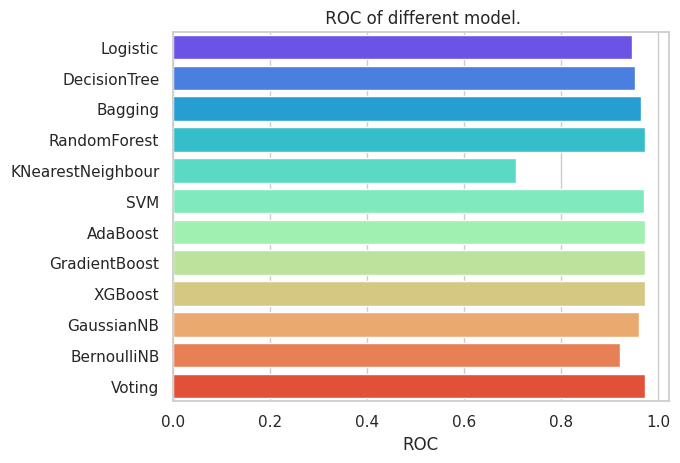

In [66]:
for col in metric_df.columns:
  sns.barplot(data= metric_df, x =col, y=metric_df.index, palette ='rainbow')
  plt.title(f' {col} of different model.')
  plt.show()

# Conclusion

### - In this project, different models are tested individually without hyperparameter tuning and imbalance treatment. Most of the models are performing well except the KNN classifier. There is a scope for enhancement of the performance of KNN classifier with hyperparameter tuning.
  


Project completed on 9th August 2023 by Payal Mohanty